# Investigating_Fandango_Movie_Ratings

In this project, we analyzed the recent movie ratings data at the [Fandango website](https://www.fandango.com/), an online movie ratings aggregator, to determine whether there has been any change in Fandango's rating system after Hickey's analysis. Walt Hickey was a data journalist who analyzed movie ratings data in October 2015, and found strong evidence to suggest that Fandango's rating system was biased and dishonest. He published his analysis in the article which is available [here](https://fivethirtyeight.com/features/fandango-movies-ratings/). Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

In order to figure out whether there has been any change in Fandango's rating system after Hickey's analysis, it is best to compare the system's characteristics previous and after the analysis. Therefore, we used the data that Hickey collected to analyze the characteristics of Fandango's rating system previous to his analysis which is available [here](https://github.com/fivethirtyeight/data/tree/master/fandango). However, below are the descriptions for some of the columns:

|Column|Definition|
|---|---|
|FILM|The film in question|
|RottenTomatoes|The Rotten Tomatoes Tomatometer score for the film|
|RottenTomatoes_User|The Rotten Tomatoes user score for the film|
|Metacritic|The Metacritic critic score for the film|
|Metacritic_User|The Metacritic user score for the film|
|IMDB|The IMDb user score for the film|
|Fandango_Stars|The number of stars the film had on its Fandango movie page|
|Fandango_Ratingvalue|The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.|
|RT_norm|The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system|
|RT_user_norm|The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system|
|Metacritic_norm|The Metacritic critic score for the film, normalized to a 0 to 5 point system|
|Metacritic_user_nom|The Metacritic user score for the film, normalized to a 0 to 5 point system|
|IMDB_norm|The IMDb user score for the film, normalized to a 0 to 5 point system|
|RT_norm_round|The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star|
|RT_user_norm_round|The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star|
|Metacritic_norm_round|The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star|
|Metacritic_user_norm_round|The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star|
|IMDB_norm_round|The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star|
|Metacritic_user_vote_count|The number of user votes the film had on Metacritic|
|IMDB_user_vote_count|The number of user votes the film had on IMDb|
|Fandango_votes|The number of user votes the film had on Fandango|
|Fandango_Difference|The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue|

`fandango_scrape.csv` contains every film pulled from Fandango.

|Column|Definiton|
|---|---|
|FILM|The movie|
|STARS|Number of stars presented on Fandango.com|
|RATING|The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.|
|VOTES|number of people who had reviewed the film at the time we pulled it.|

Furthermore, data related to movie's ratings released in 2016 and 2017 is publicly available [here](https://github.com/mircealex/Movie_ratings_2016_17) and we used it to analyze the rating system's characteristics after Hickey's analysis. Moreover, below are the descriptions for some of the columns:

|Column|Description|
|---|---|
|movie|the name of the movie|
|year|the release year of the movie|
|metascore|the Metacritic rating of the movie (the "metascore" - critic score)|
|imdb|the IMDB rating of the movie (user score)|
|tmeter|the Rotten Tomatoes rating of the movie (the "tomatometer" - critic score)|
|audience|the Rotten Tomatoes rating of the movie (user score)|
|fandango|the Fandango rating of the movie (user score)|
|n_metascore|the metascore normalized to a 0-5 scale|
|n_imdb|the IMDB rating normalized to a 0-5 scale|
|n_tmeter|the tomatometer normalized to a 0-5 scale|
|n_audience|the Rotten Tomatoes user score normalized to a 0-5 scale|
|nr_metascore|the metascore normalized to a 0-5 scale and rounded to the nearest 0.5}|
|nr_imdb|the IMDB rating normalized to a 0-5 scale and rounded to the nearest 0.5|
|nr_tmeter|the tomatometer normalized to a 0-5 scale and rounded to the nearest 0.5|
|nr_audience|the Rotten Tomatoes user score normalized to a 0-5 scale and rounded to the nearest 0.5|

In [1]:
# importing pandas library
import pandas as pd

# avoiding having displayed truncated output
pd.options.display.max_columns = 100

# reading and exploring two datasets
previous_dataset = pd.read_csv('fandango_score_comparison.csv')
after_dataset = pd.read_csv('movie_ratings_16_17.csv')

previous_dataset.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [2]:
after_dataset.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [3]:
# isolating the columns that provide information about Fandango's ratings for
# later use and making copies of it to avoid SettingWithCopyWarning

fandango_previous = previous_dataset[['FILM', 'Fandango_Stars',
                                      'Fandango_Ratingvalue', 'Fandango_votes', 
                                      'Fandango_Difference']].copy()

fandango_after = after_dataset[['movie', 'year', 'fandango']].copy()

In [4]:
# examining isolated dataset of fandango_previous
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [5]:
# examining isolated dataset of fandango_after
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


Since the goal of our analysis is to determine whether there has been any change in the Fandango’s rating system after Hickey’s analysis, the population of interest for our analysis would be all movie ratings stored on Fandango’s website, regardless of the releasing year.

However, as for sample of our population we are interested in sampling the population at two different periods in time, i.e. previous and after Hickey’s analysis. Moreover, we need to ensure that the samples are representative of the population, otherwise we should expect a large sampling error leading to wrong conclusions.

After reading the Hickey’s article and `README.md` of [previous_dataset’s repository]( https://github.com/fivethirtyeight/data/tree/master/fandango), we found out that he used the following sampling criteria:
- The movie must have had at least 30 fan ratings on Fandango’s website at the time of sampling (Aug. 24, 2015);
- The movie must have been released or had tickets on sale in 2015.

Based on above criteria, it is obvious that sampling was not random because not every single movie had an equal chance of being selected or included in the sample, for e.g. movies having under 30 fan ratings or those without tickets on sale in 2015 were ignored. However, this sample is not likely to be representative of the population as it is subject to temporal trends, for e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

Furthermore, the sampling criteria of other sample, [after_dataset’s repository]( https://github.com/mircealex/Movie_ratings_2016_17), can be read in the `README.md` as below:
- Movie must have been released in 2016 or later;
- Movie must have had a considerable number of votes and reviews.

This second sample is also subject to temporal trends and it is unlikely to be representative of our population of interest. After reviewing both above criteria for sampling that were used by both authors of the previous and after datasets, it is clear that they used a set of criteria to get a sample that would fit their questions and this sampling method is called **purposive sampling** (or selective/subjective/judgmental sampling). Although these samples were good enough for their research, they do not seem too useful for us and therefore we would consider one of two options:
- Collecting new data for our analysis;
- Changing the goal of our analysis.

However, instead of collecting new data we would go for second option and therefore, our new goal will be to determine whether there is any difference between Fandango’s ratings for popular movies in 2015 and 2016. The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.. With this new research goal in our mind, we have two population of interest:
- All Fandango’s ratings for popular movies released in 2015;
- All Fandango’s ratings for popular movies released in 2016.

Here, we need to determine as to what movie counts as popular movie and therefore, we will use Hickey’s benchmark of 30 fan ratings and count a movie 
as popular only if it has 30 fan ratings or more on Fandango’s website.

In [6]:
# verifying the dataset for popular movies
sum(fandango_previous['Fandango_votes'] < 30)

0

However, our second dataset does not provide information about the number of fan ratings, and this raises representativity issues once again, so we will determine if this sample is truly representative and contains popular movies, i.e. ones having fan ratings of 30 or above.

In [7]:
# determining the representation of sample in fandango_after dataframe
fandango_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed and this is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample as mentioned in below results.

In [8]:
# determining various random seeds of after_dataset dataframe
fandango_after.sample(10)

,movie,year,fandango
84,Jason Bourne,2016,4.0
180,The Huntsman: Winter's War,2016,4.0
40,Deadpool,2016,4.5
4,A Hologram for the King,2016,3.0
185,The LEGO Batman Movie,2017,4.5
173,The Edge of Seventeen,2016,4.0
87,Keanu,2016,4.0
172,The Duel,2016,3.5
148,Split,2016,4.0
6,A Street Cat Named Bob,2016,4.5


In [9]:
# determining various random seeds of after_dataset dataframe
fandango_after.sample(10)

,movie,year,fandango
7,Alice Through the Looking Glass,2016,4.0
61,Get Out,2017,4.5
147,Snowden,2016,4.0
137,Ride Along 2,2016,4.0
186,The Light Between Oceans,2016,4.0
182,The Jungle Book,2016,4.5
158,The 9th Life of Louis Drax,2016,3.5
183,The Last Word,2017,3.5
24,Blair Witch,2016,3.0
17,Barbershop: The Next Cut,2016,4.5


After exploring the two datasets, we noticed that there are movies with a releasing year different than 2015 or 2016. However, for our purposes, we will need to isolate only the movies released in 2015 and 2016.

We'll start with Hickey's dataset and isolate only the movies released in 2015. There's no special column for the releasing year, but we should be able to extract it from the strings in the FILM column.

In [10]:
# examining the fandango_previous dataframe
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [11]:
# extracting the year out of the 'FILM' column
new_column_year = (fandango_previous['FILM'].str.replace(')', '')
                   .str.split('(')
                  )
year_list = []
for year in new_column_year:
    y_ = year[-1]
    year_list.append(y_)
year_list[:10]

['2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2014',
 '2015',
 '2015']

In [12]:
# creating new column in fandango_previous dataframe containing year_list
fandango_previous['Year'] = year_list
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [13]:
# examining the frequency distribution for the Year column to isolate
# the movies released in 2015.
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [14]:
fandango_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
Year                    146 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 6.9+ KB


In [15]:
# isolating the 2015 year rows in the dataframe
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [16]:
# examining the fandango_after dataframe
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [17]:
fandango_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [18]:
# verifying the years in the fandango_after dataframe
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [19]:
# isolating the 2016 data in the fandango_after dataframe
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016.year.value_counts()

2016    191
Name: year, dtype: int64

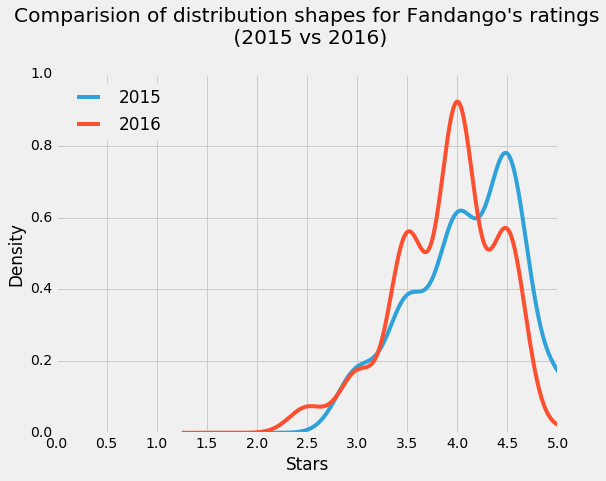

In [20]:
# comparing distribution for two samples (fandango_2015 and fandango_2016)
# using kernel density estimate (kde) plot

# importing libraries
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
# changing style of plot
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True,
                                         figsize=(8,6))
fandango_2016['fandango'].plot.kde(label='2016', legend=True, figsize=(8,6))
plt.xlabel('Stars')
plt.xticks(arange(0.0,5.1,0.5))
# limiting the rating from 0 to 5
plt.xlim(0,5)
plt.title("Comparision of distribution shapes for Fandango's ratings\n (2015 vs 2016)", y=1.07)
plt.show()

From above plot, it is obvious that the shapes of both distributions are left (negatively) skewed and distribution of 2016 sample is slightly moved to left relative to 2015 distribution. Furthermore, the left skewness suggests that the movies on Fandango are given mostly high fan ratings. The slight left shift of the 2016 distribution indicates that there was, indeed, a difference in the Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016 and that movies in 2016 were rated slightly lower that those in 2015.

In [21]:
# examining frequency distribution tables of two distributions using relative
# frequencies (percentages) to analyze some numbers

print('2015' + '\n' + '-'*15)
(fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()) * 100

2015
---------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [22]:
print('2016' + '\n' + '-' * 15)
(fandango_2016['fandango'].value_counts(normalize=True).sort_index()) * 100

2016
---------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. There is clearly a difference between the two frequency distributions, however, the direction of the difference is not as clear as it was on the kernel density plots.

In [23]:
# comparing the mean, median and mode for each distribution

mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

# indexing the output (containing dtype) of mode method on series
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

# creating a dataframe containing mean, median and mode for each distribution
summary = pd.DataFrame()
# creating columns
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
# creating index
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


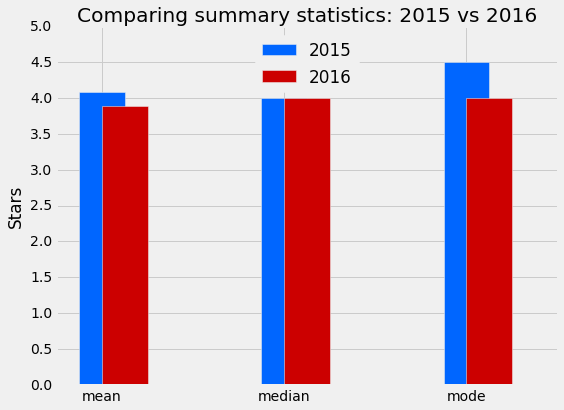

In [24]:
# plotting grouped bar for each of the summary statistics

# utilizing the style
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(label='2015', align='center', color='#0066FF',
                         width=.25)
summary['2016'].plot.bar(label='2016', align='edge', color='#CC0000', rot=0,
                         figsize=(8,6), width=.25)

# setting title
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylabel('Stars')
plt.ylim(0,5)
plt.yticks(arange(0.0, 5.5, 0.5))
plt.legend(loc='upper center')
plt.show()

In [25]:
# calculating percentage difference in the mean and mode for each distrbution

print('mean_difference' + '\n' + '-' * 15)
print(round(((summary.loc['mean'][0] - summary.loc['mean'][1]) /
       summary.loc['mean'][0]) * 100, 2), '%')
print('\n')
print('mode difference' + '\n' + '-' * 15)
print(round(((summary.loc['mode'][0] - summary.loc['mode'][1]) /
      summary.loc['mode'][0]) * 100, 2), '%')

mean_difference
---------------
4.84 %


mode difference
---------------
11.11 %


Above results indicate that there was a drop of 5% of mean rating in 2016 relative to the mean rating in 2015. While the median is the same for both distributions, the mode is lower in 2016 by 11%. The direction of the change we saw on the kernel density plot for mean is confirmed; on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

### Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. Moreover, it seems that the difference in the ratings was caused by Fandango fixing the biased rating system after Hickey's analysis.